In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder , PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB


In [67]:
# Step 1: Load the Dataset
df = pd.read_csv('crop_yield.csv')

In [68]:
df = df.dropna()


In [69]:
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [70]:
# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None


In [71]:
print("\nBasic Statistical Overview:\n")
print(df.describe())


Basic Statistical Overview:

          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    

In [72]:
print("\nChecking for Missing Values:\n")
print(df.isnull().sum())


Checking for Missing Values:

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


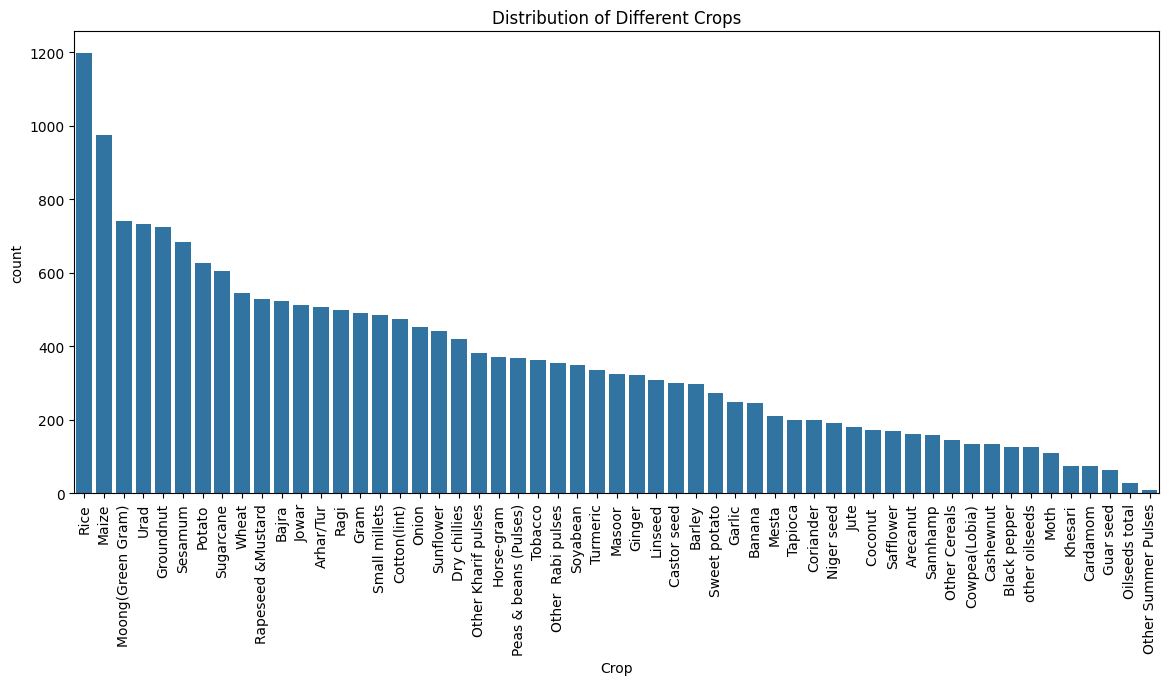

In [73]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Crop', order=df['Crop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Different Crops')
plt.show()

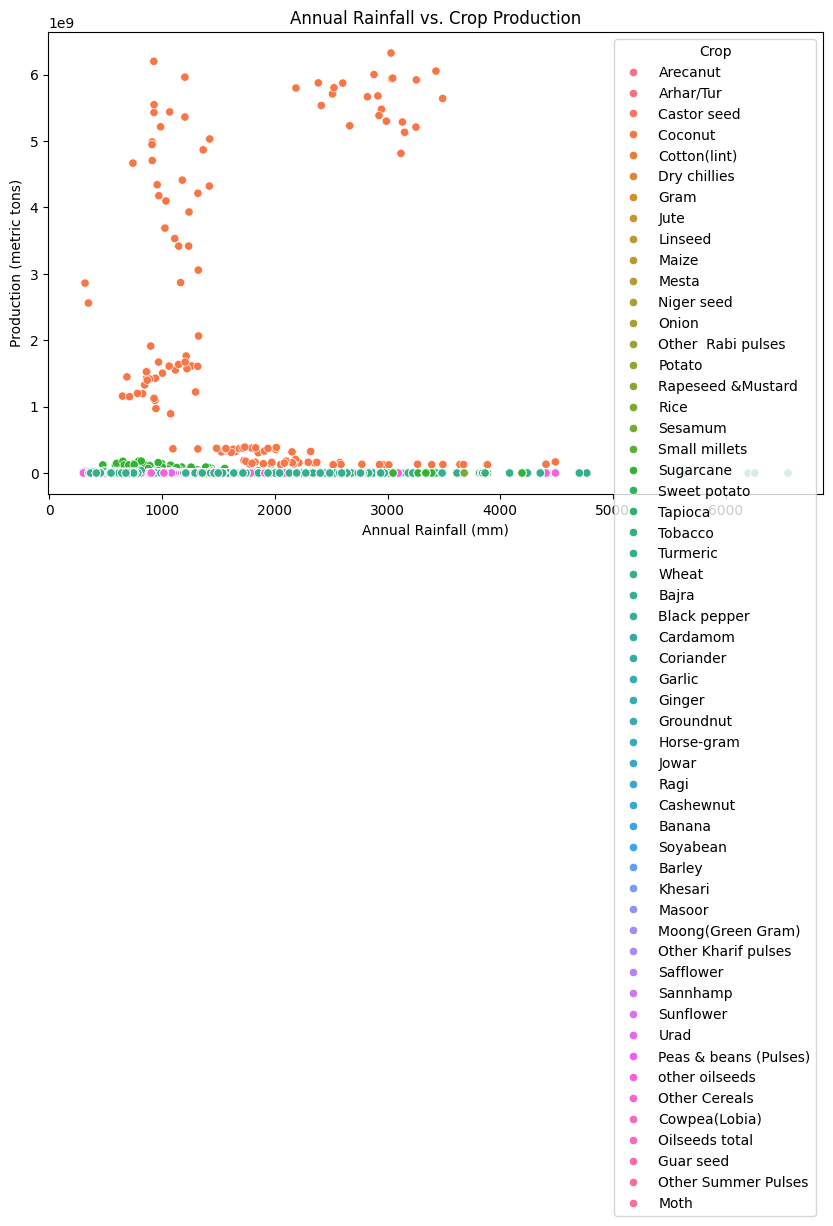

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Rainfall', y='Production', hue='Crop')
plt.title('Annual Rainfall vs. Crop Production')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Production (metric tons)')
plt.show()

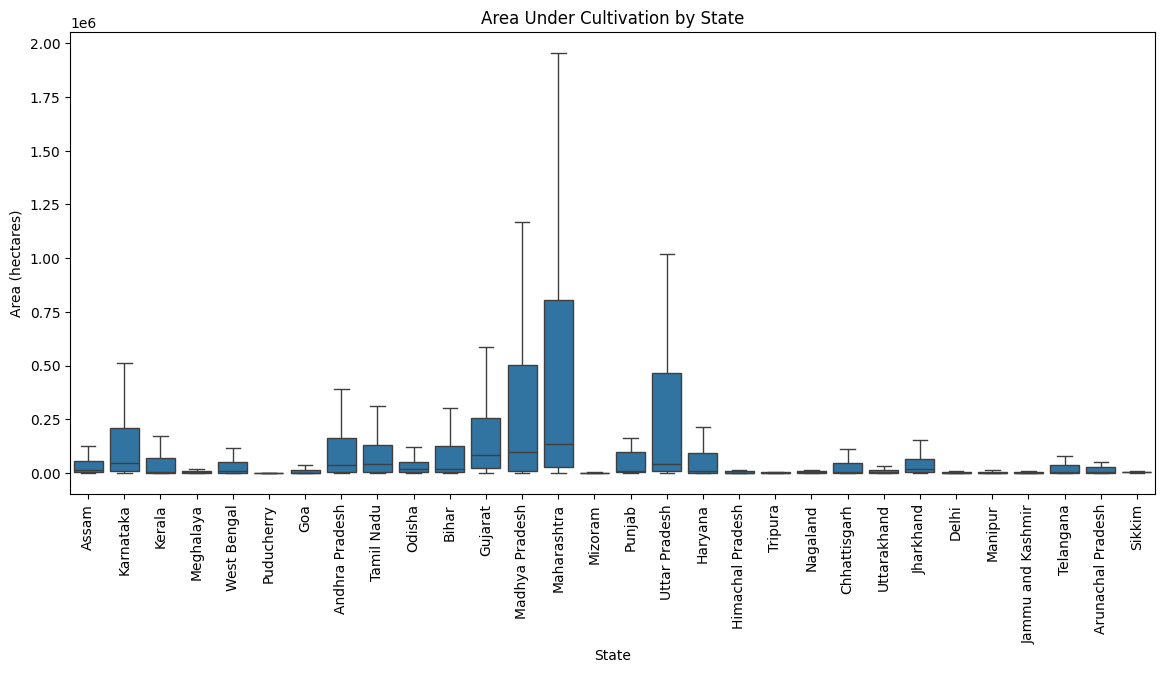

In [75]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='State', y='Area', showfliers=False)
plt.xticks(rotation=90)
plt.title('Area Under Cultivation by State')
plt.ylabel('Area (hectares)')
plt.show()

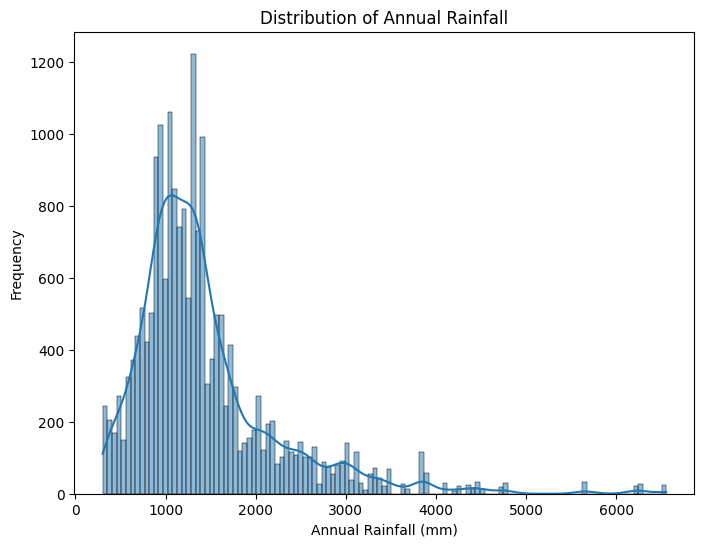

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Annual_Rainfall'], kde=True)
plt.title('Distribution of Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

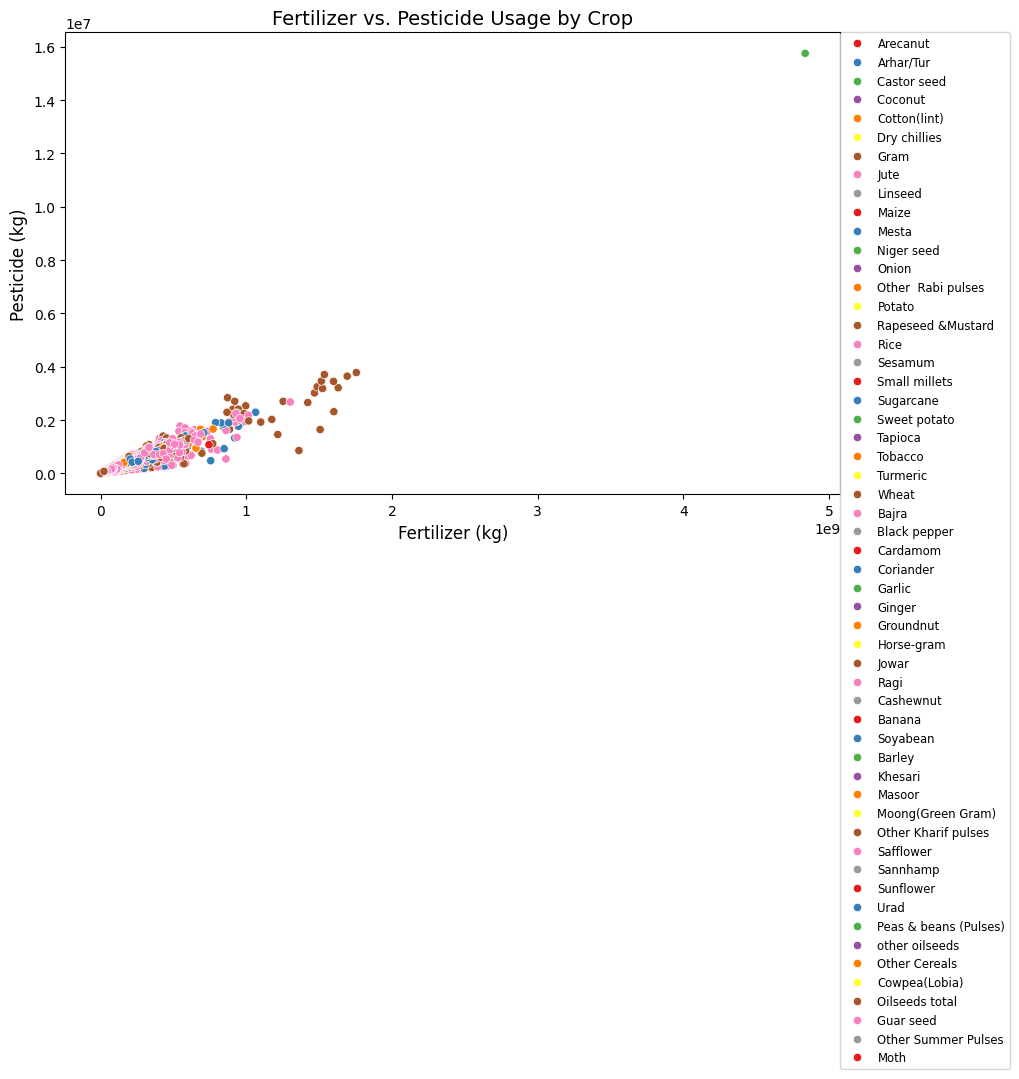

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fertilizer', y='Pesticide', hue='Crop', palette='Set1')

plt.title('Fertilizer vs. Pesticide Usage by Crop', fontsize=14)  
plt.xlabel('Fertilizer (kg)', fontsize=12)  
plt.ylabel('Pesticide (kg)', fontsize=12)  


plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0., fontsize='small')

plt.show()



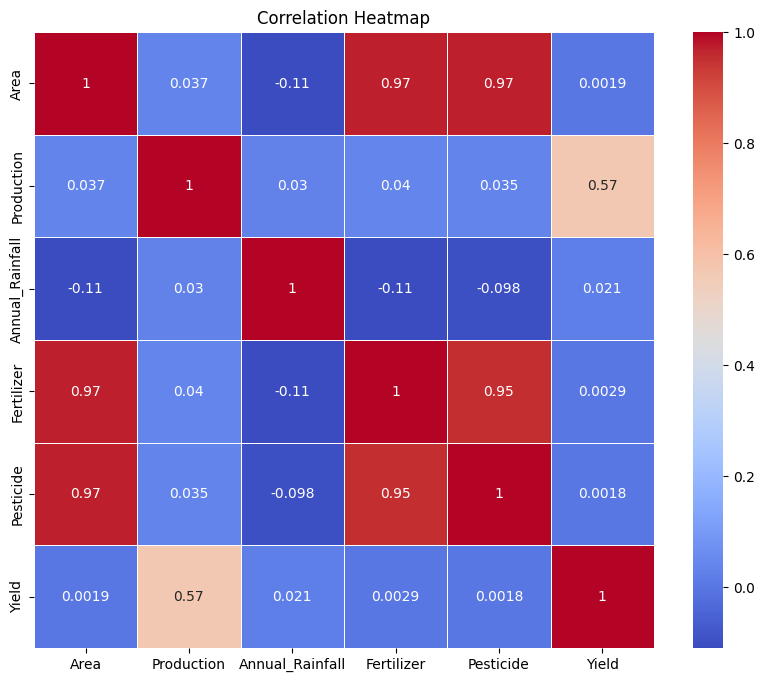

In [78]:
plt.figure(figsize=(10, 8))
corr = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
df['Yield'] = df['Production'] / df['Area'] 

In [82]:
X = df.drop(columns=['Yield'])
y = df['Yield']
label_encoder = LabelEncoder()
X= pd.get_dummies(X)
y= label_encoder.fit_transform(y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
label_encoder = LabelEncoder()

# Define the features and target variable
X = df.drop(columns=['Crop'])  # Assuming 'Crop' is the target variable
y = df['Crop']

X= pd.get_dummies(X)
y= label_encoder.fit_transform(y)
# One-hot encode categorical features


# Encode the target variable (Crop)


# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Standard Deviation of CV Accuracy: {np.std(cv_scores)}')

Cross-Validation Accuracy Scores: [0.74987303 0.75114271 0.76180802 0.75393601 0.75514351]
Mean CV Accuracy: 0.7543806573646668
Standard Deviation of CV Accuracy: 0.004165295060084855


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

X= pd.get_dummies(X)
y= label_encoder.fit_transform(y)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive
cv_scores = -cv_scores

print(f'Cross-Validation MSE Scores: {cv_scores}')
print(f'Mean CV MSE: {np.mean(cv_scores)}')
print(f'Standard Deviation of CV MSE: {np.std(cv_scores)}')



Cross-Validation MSE Scores: [ 98.10272012  98.29528307  98.31524992  98.56642899 107.24328355]
Mean CV MSE: 100.10459312887583
Standard Deviation of CV MSE: 3.572385683168972


In [87]:
# This will predict the crop yield based on features like area, production, rainfall, fertilizer, and pesticide usage.
X_lr = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
y_lr= df['Yield']  # Target variable is the crop yield

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_lr)

# Model Evaluation
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f'Linear Regression Mean Squared Error (MSE): {mse_lr}')
print(f'Linear Regression R-squared (R2): {r2_lr}')


Linear Regression Mean Squared Error (MSE): 550611.2680026365
Linear Regression R-squared (R2): 0.3869830774756823


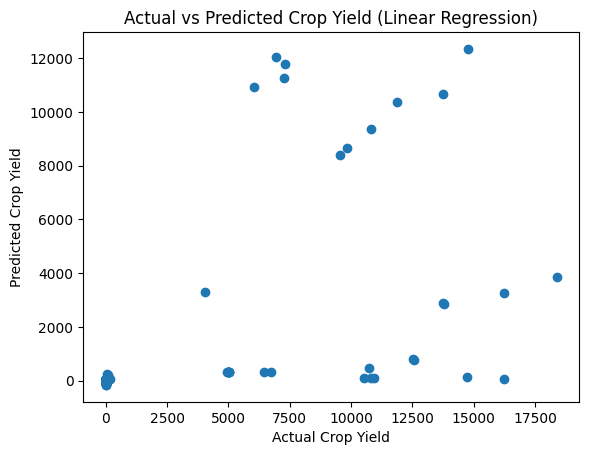

In [88]:
plt.scatter(y_test_lr, y_pred_lr)
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs Predicted Crop Yield (Linear Regression)')
plt.show()

In [89]:
df['Season']

0        Whole Year 
1        Kharif     
2        Kharif     
3        Whole Year 
4        Kharif     
            ...     
19684    Kharif     
19685    Rabi       
19686    Kharif     
19687    Kharif     
19688    Rabi       
Name: Season, Length: 19689, dtype: object

In [90]:
# Encode categorical variable 'Season' for logistic regression
# df['Season'] = df['Season'].astype('category').cat.codes

# Define features and target for logistic regression
X_logr = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]  # Independent variables
y_logr = df['Season']  # Target variable is 'Season' (categorical)

# Split the data into training and testing sets
X_train_logr, X_test_logr, y_train_logr, y_test_logr = train_test_split(X_logr, y_logr, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logr_model = LogisticRegression(max_iter=1000)

# Train the model
logr_model.fit(X_train_logr, y_train_logr)

# Make predictions on the test set
y_pred_logr = logr_model.predict(X_test_logr)

# Model Evaluation
accuracy_logr = accuracy_score(y_test_logr, y_pred_logr)
print(f'Logistic Regression Accuracy: {accuracy_logr * 100:.2f}%')

# Classification Report
print(classification_report(y_test_logr, y_pred_logr))



Logistic Regression Accuracy: 43.91%
              precision    recall  f1-score   support

 Autumn            0.00      0.00      0.00        91
 Kharif            0.43      0.99      0.60      1655
 Rabi              0.00      0.00      0.00      1142
 Summer            0.00      0.00      0.00       244
 Whole Year        0.91      0.12      0.21       733
 Winter            0.00      0.00      0.00        73

    accuracy                           0.44      3938
   macro avg       0.22      0.19      0.13      3938
weighted avg       0.35      0.44      0.29      3938



c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

Text(0.5, 23.52222222222222, 'Predicted')

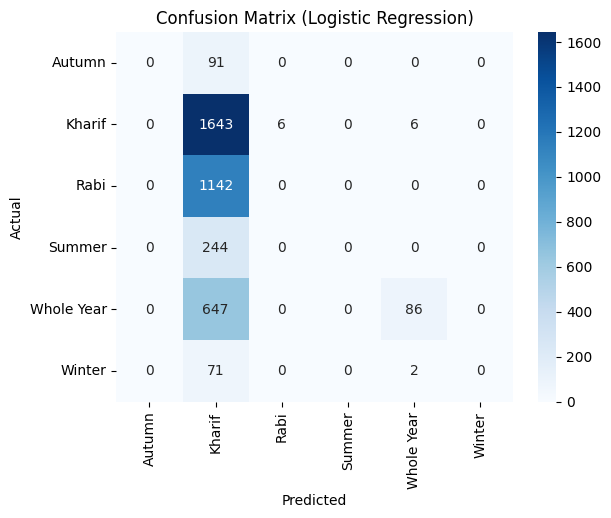

In [91]:
conf_matrix_logr = confusion_matrix(y_test_logr, y_pred_logr)
sns.heatmap(conf_matrix_logr, annot=True, fmt='d', cmap='Blues', xticklabels=['Autumn', 'Kharif', 'Rabi','Summer', 'Whole Year','Winter'], yticklabels=['Autumn', 'Kharif', 'Rabi','Summer', 'Whole Year','Winter'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.show()

In [92]:
from imblearn.over_sampling import SMOTE

# Scale the features
scaler = StandardScaler()
X_train_logr = scaler.fit_transform(X_train_logr)
X_test_logr = scaler.transform(X_test_logr)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_logr, y_train_logr)

# Initialize the Logistic Regression model with class weights
logr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model
logr_model.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred_logr = logr_model.predict(X_test_logr)

# Model Evaluation
accuracy_logr = accuracy_score(y_test_logr, y_pred_logr)
print(f'Logistic Regression Accuracy: {accuracy_logr * 100:.2f}%')

# Classification Report
print(classification_report(y_test_logr, y_pred_logr))


Logistic Regression Accuracy: 15.19%
              precision    recall  f1-score   support

 Autumn            0.05      0.22      0.08        91
 Kharif            0.58      0.11      0.19      1655
 Rabi              0.20      0.01      0.02      1142
 Summer            0.07      0.56      0.13       244
 Whole Year        0.22      0.30      0.26       733
 Winter            0.08      0.25      0.12        73

    accuracy                           0.15      3938
   macro avg       0.20      0.24      0.13      3938
weighted avg       0.35      0.15      0.15      3938



In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Create interaction features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_logr_poly = poly_features.fit_transform(X_logr)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_logr_pca = pca.fit_transform(X_logr)

In [94]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [500, 1000, 2000],
    'solver': ['lbfgs']
}

# Add a conditional statement to exclude l1 penalty when using lbfgs solver
param_grid_conditional = [
    {'penalty': ['l1'], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
]

grid_search = GridSearchCV(LogisticRegression(), param_grid_conditional, cv=5, scoring='accuracy')
grid_search.fit(X_train_logr, y_train_logr)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_:.2f}%')

Best hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.43%


In [95]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Fit and transform the training data
X_train_poly = poly_features.fit_transform(X_train_logr)

# Create a new grid search object with the polynomial features
grid_search = GridSearchCV(LogisticRegression(), param_grid_conditional, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train_logr)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_:.2f}%')

c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.44%


c:\Users\dwija\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


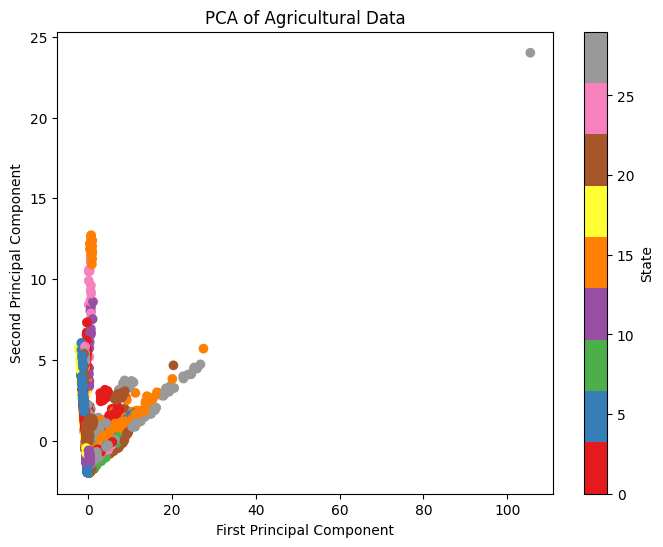

Explained variance ratio:  [0.07233557 0.04767444]


In [100]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'State' column to numeric values
label_encoder = LabelEncoder()
state_encoded = label_encoder.fit_transform(df['State'])

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=state_encoded, cmap='Set1')
plt.title('PCA of Agricultural Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='State')
plt.show()

# Explained variance ratio
print("Explained variance ratio: ", pca.explained_variance_ratio_)


In [97]:
df['Yield_Class'] = pd.qcut(df['Yield'], q=4, labels=False)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['State'] = label_encoder.fit_transform(df['State'])

# Define features and target
X = df.drop(columns=['Yield', 'Yield_Class'])
y = df['Yield_Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.3037074657186389
Confusion Matrix:
[[941  24   7   1]
 [926  24  42   4]
 [801  64 114  23]
 [640  64 146 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.97      0.44       973
           1       0.14      0.02      0.04       996
           2       0.37      0.11      0.17      1002
           3       0.81      0.12      0.21       967

    accuracy                           0.30      3938
   macro avg       0.40      0.31      0.22      3938
weighted avg       0.40      0.30      0.21      3938



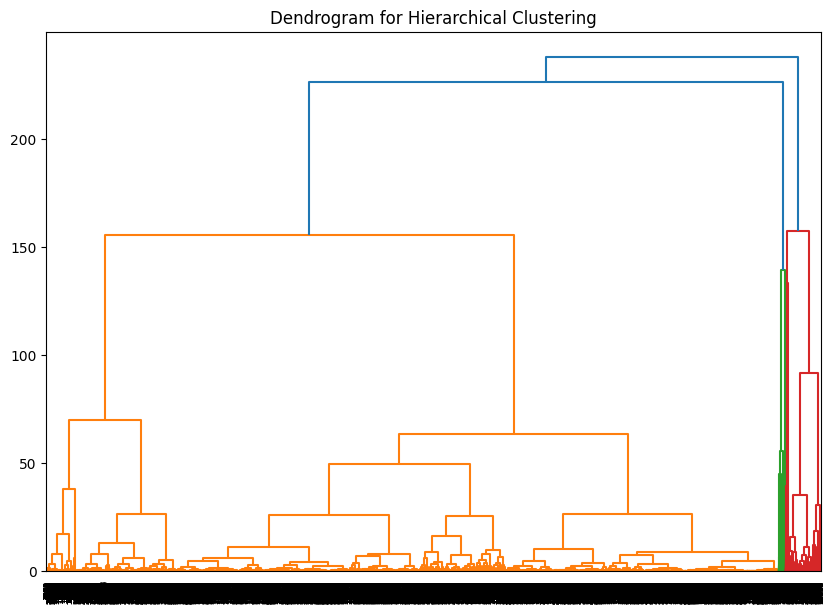

In [99]:
# T10: Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Normalize the data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']])

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


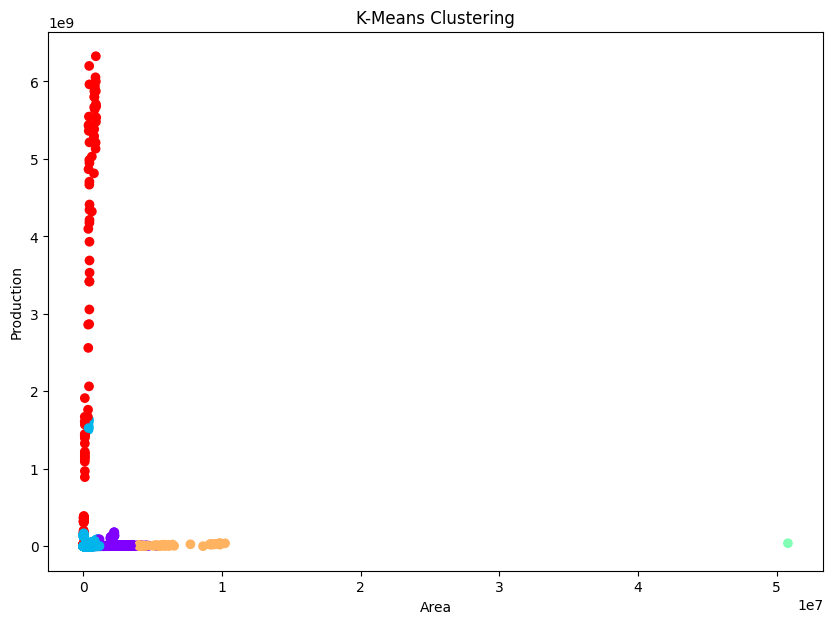

In [101]:
# T11: K-Means Clustering
from sklearn.cluster import KMeans

# Set the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(df['Area'], df['Production'], c=df['Cluster'], cmap='rainbow')
plt.title("K-Means Clustering")
plt.xlabel("Area")
plt.ylabel("Production")
plt.show()


In [102]:
# T12: Cluster Evaluation
from sklearn.metrics import silhouette_score

# Evaluate K-Means clusters
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg}')

# Evaluate using inertia (within-cluster sum of squares)
print(f'Inertia (within-cluster sum of squares): {kmeans.inertia_}')


Silhouette Score for K-Means Clustering: 0.7647998521201845
Inertia (within-cluster sum of squares): 40979.291211967255
